In [294]:
import numpy as np
import pandas as pd

In [295]:
frequency = 920.4e6
c = 2.9998e8
wave_length = c/frequency
sample_count = 100

In [296]:
x_list = np.round(np.arange(-0.35,0.4,0.05),2)
y = 0.51
angles_rad = np.arctan((x_list)/y)

In [297]:
df = pd.read_csv("../data/tag-rotation/data.csv")
df = df[["x", "phase"]]
phases = np.stack([df[df["x"] == x]["phase"].to_numpy() for x in x_list], axis=1)

data = (phases - ((-4*np.pi*np.sqrt(x_list**2+y**2)/wave_length))) % (2*np.pi)
data = (data - (0.9*angles_rad)) % (2*np.pi)
# data = np.unwrap(data, axis=1)

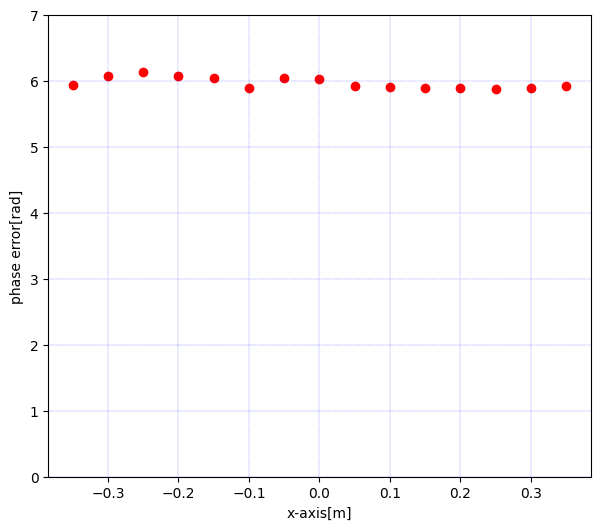

In [298]:
from matplotlib import pyplot as plt

data = data + np.array([0.1,-0.05,-0.06,-0.1,-0.1,-0.2,-0.1,0,0,0,0,0,0,0,0])

fig,axes = plt.subplots(figsize=(7,6))
axes.scatter(x_list, data.mean(axis=0), c="r")
# axes.plot(x_list, (0.9*angles_rad) % (2*np.pi))
axes.set_xlabel("x-axis[m]")
axes.set_ylabel("phase error[rad]")
axes.grid(color='b', linestyle=':', linewidth=0.3)
axes.set_yticks(np.arange(0,7.5,1))
# axes[1].scatter(x_list, phases.mean(axis=0), c="r")
# axes[1].plot(x_list, (-4*np.pi*np.sqrt(x_list**2+y**2)/wave_length ) % (2*np.pi))